In [35]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf
import missingno as msno

cd = "/Users/marimason/Documents/Data Science/Forecasting/Rossman Store Sales/Data"
os.chdir(cd)
current_directory = os.getcwd()
print(f"The current working directory is {current_directory}")

The current working directory is /Users/marimason/Documents/Data Science/Forecasting/Rossman Store Sales/Data


In [36]:
#Read in data from training file
store = pd.read_csv("store.csv")
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


/var/folders/lx/_8x9r4p95db9nb99vkl8fbkc0000gn/T/ipykernel_10745/1909314767.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("train.csv")


In [37]:
# Step 3: Data Exploration and Preprocessing
# Perform exploratory data analysis
print(train.head())  # Display the first few rows of the dataset
print(train.info())  # Get information about the dataset

   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 n

In [38]:
#Merge training and store data
train_store = pd.merge(train, store, on='Store')

#Merge test and store data
test_store = pd.merge(test, store, on='Store')

In [39]:
print(train_store.head())  # Display the first few rows of the dataset
print(train_store.info())  # Get information about the dataset

   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      1          4  2015-07-30   5020        546     1      1            0   
2      1          3  2015-07-29   4782        523     1      1            0   
3      1          2  2015-07-28   5011        560     1      1            0   
4      1          1  2015-07-27   6102        612     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         c          a               1270.0   
2              1         c          a               1270.0   
3              1         c          a               1270.0   
4              1         c          a               1270.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                   

<Axes: >

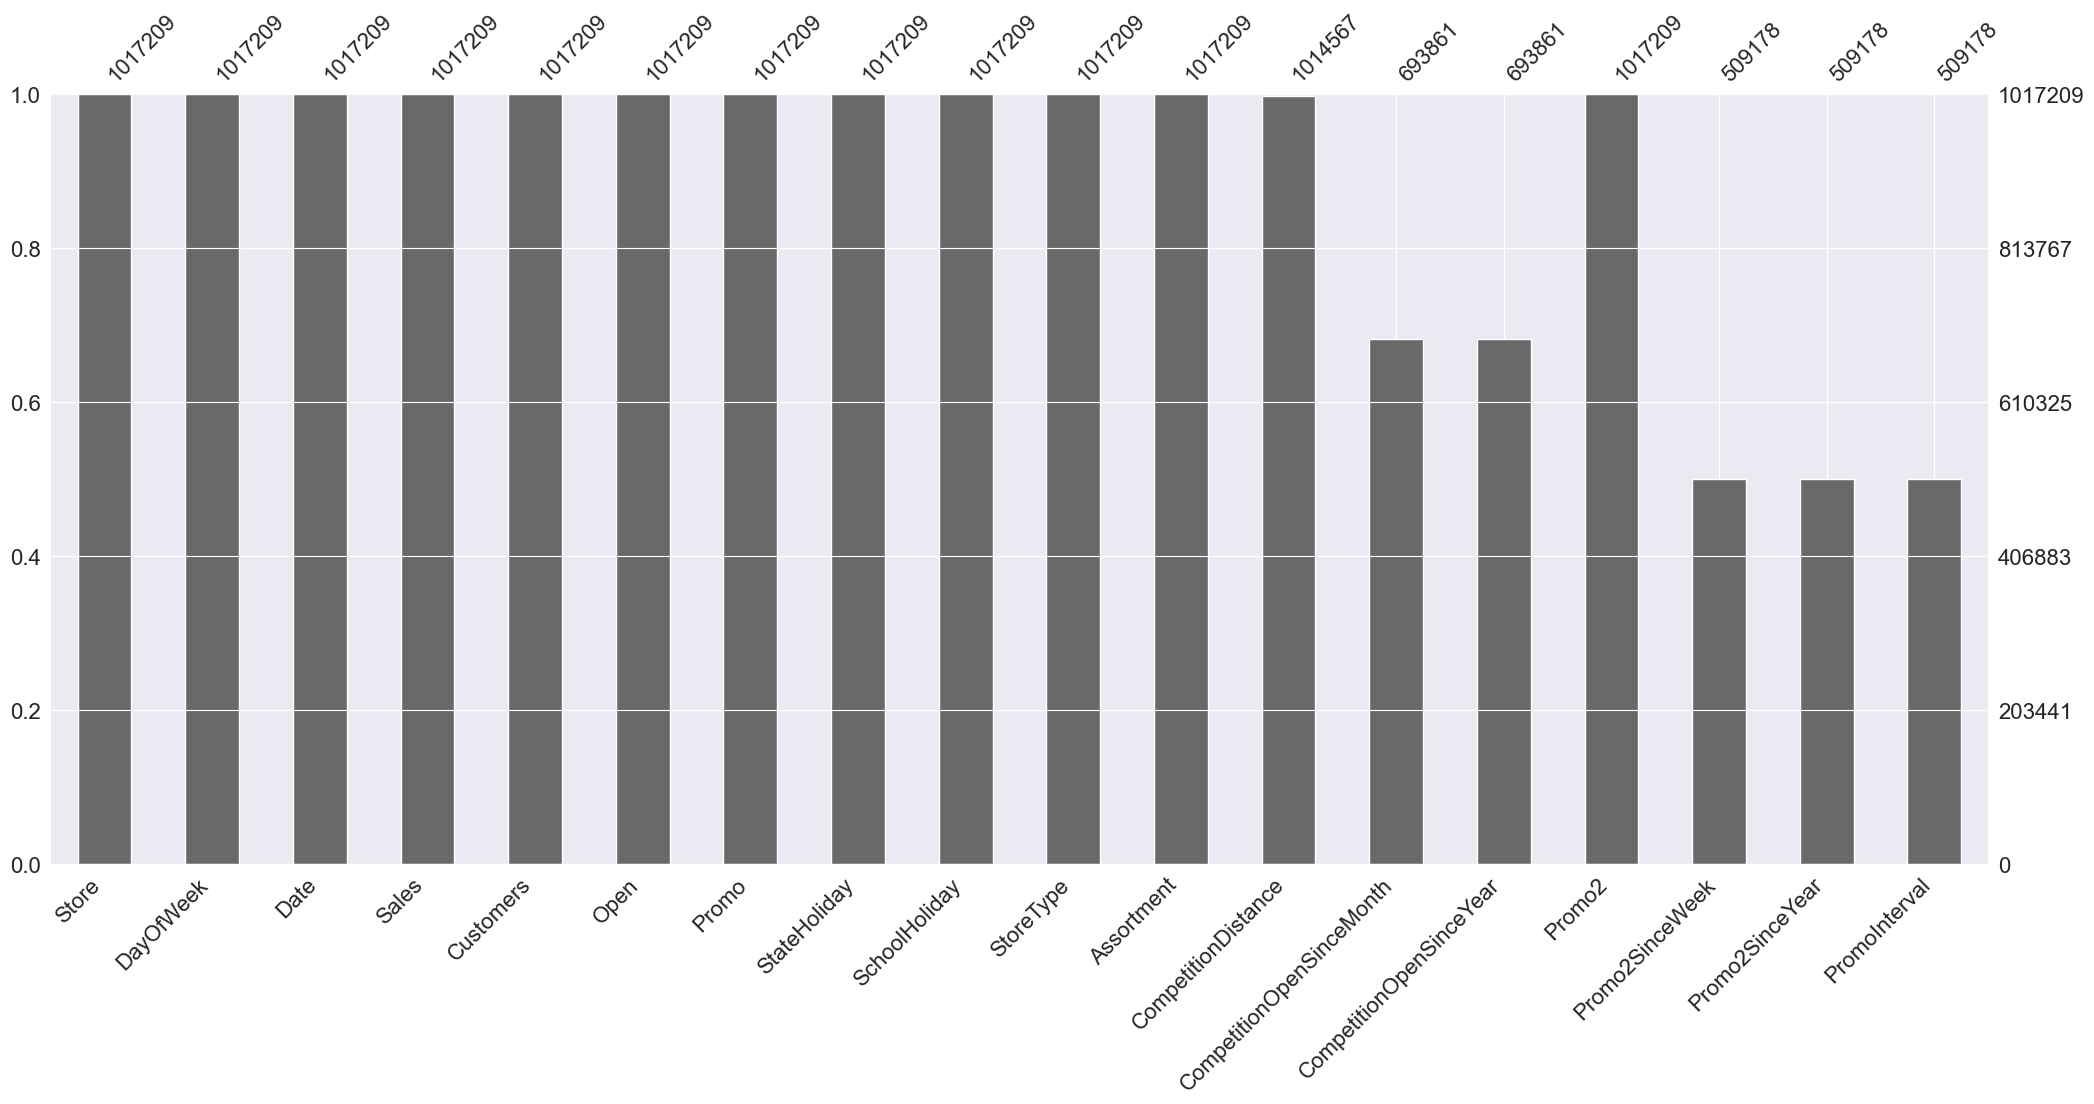

In [40]:
msno.bar(train_store)  # Visualize missing values as a matrix

In [42]:
# This is just some asthetics settings for plots before we start EDA
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None) #Enable to show max columns in code cells
sns.set_style('darkgrid') #set sns plot background
matplotlib.rcParams['font.size'] = 14 #set the deafult plot font size for this notebook
matplotlib.rcParams['figure.figsize'] = (10, 6) #set the deafult plot size for this notebook
matplotlib.rcParams['figure.facecolor'] = '#00000000' #set matplotlib plot background

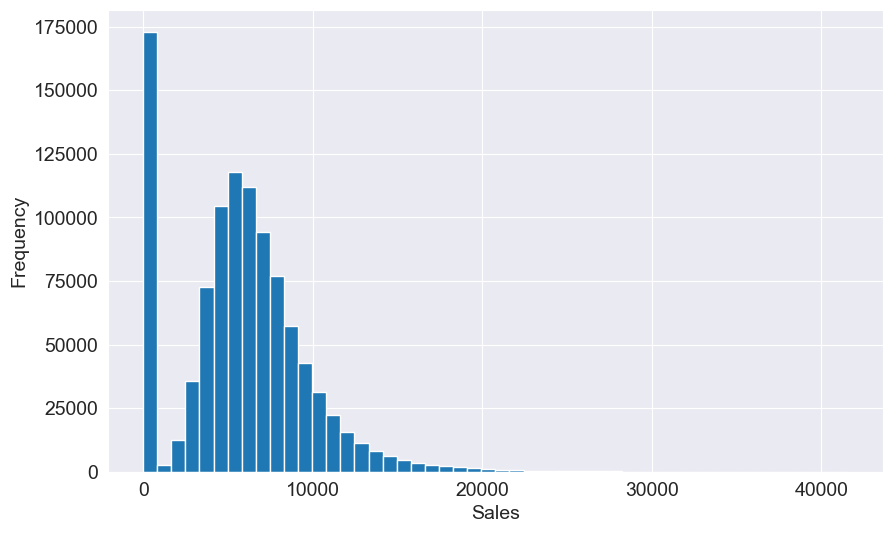

In [18]:
plt.hist(df['Sales'], bins=50)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

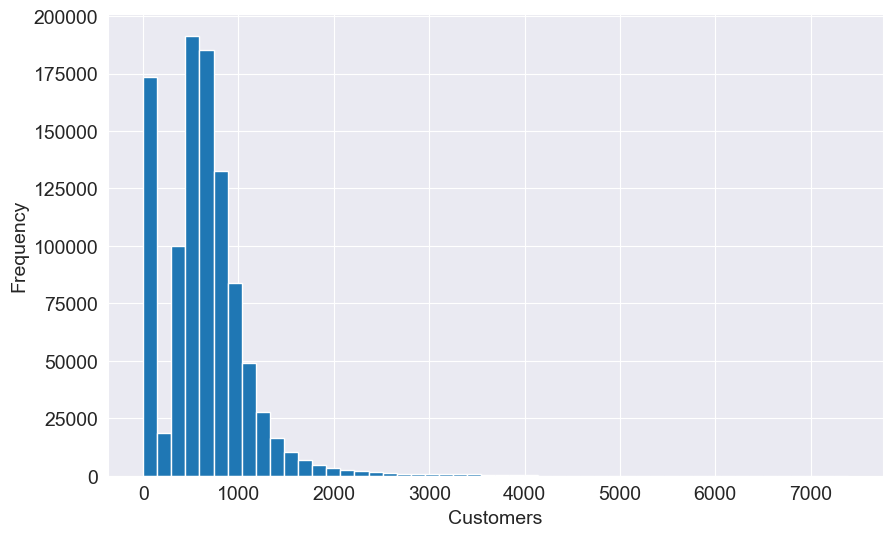

In [43]:
# Plot a histogram of the Customers column
plt.hist(train_store['Customers'], bins=50)
plt.xlabel('Customers')
plt.ylabel('Frequency')
plt.show()

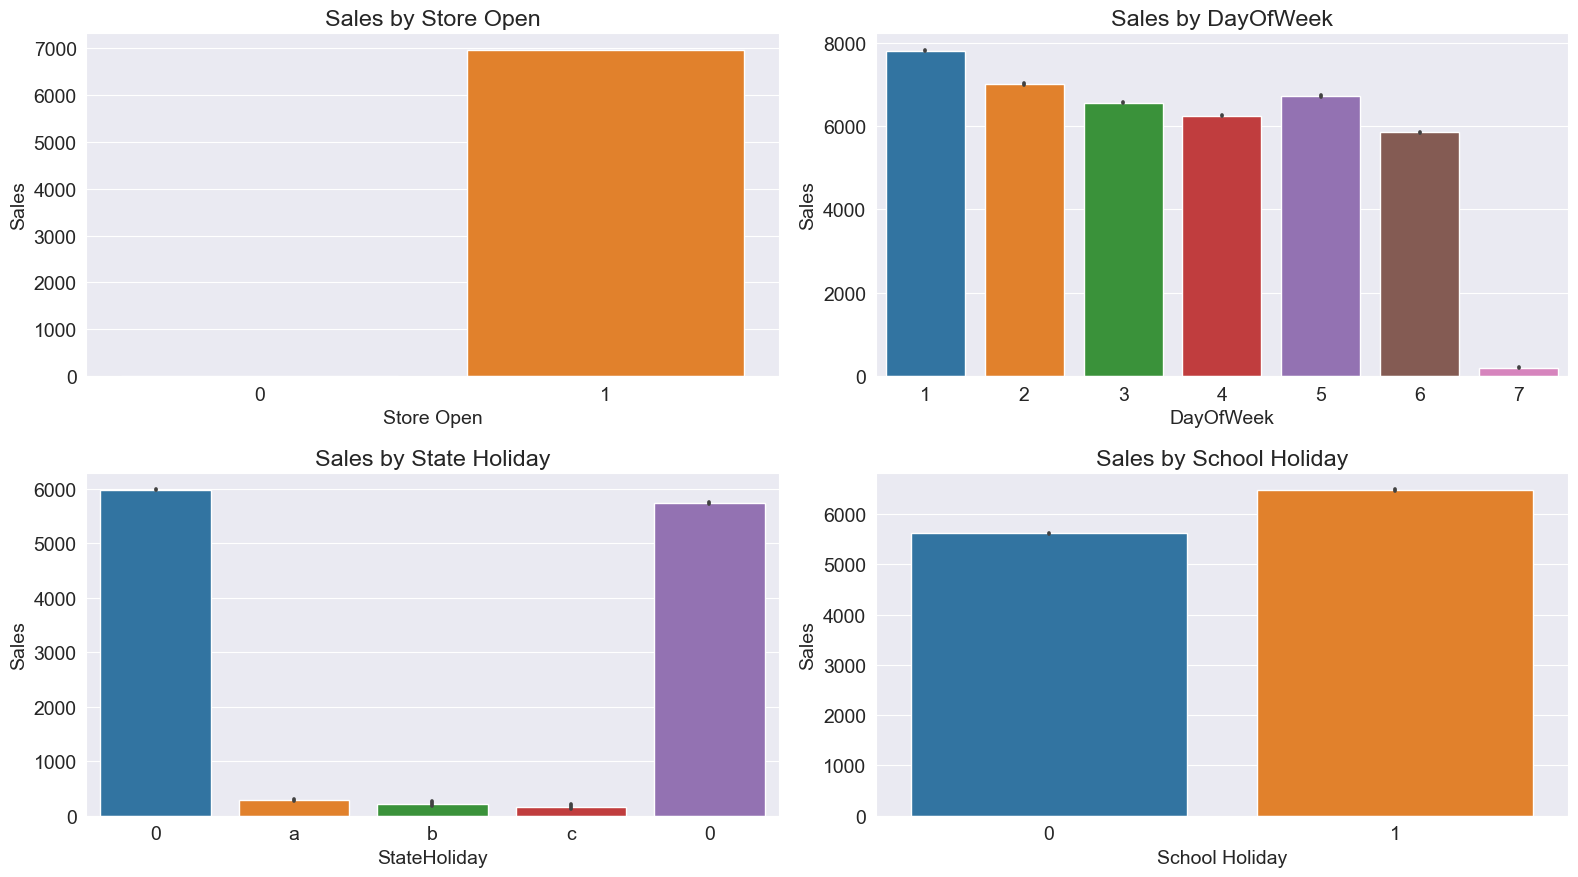

In [44]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 9))

# Bar plot of Sales by Store Open
sns.barplot(data=train_store, x="Open", y="Sales", ax=axes[0, 0])
axes[0, 0].set_title("Sales by Store Open")
axes[0, 0].set_xlabel("Store Open")
axes[0, 0].set_ylabel("Sales")

# Bar plot of Sales by DayOfWeek
sns.barplot(data=train_store, x="DayOfWeek", y="Sales", ax=axes[0, 1])
axes[0, 1].set_title("Sales by DayOfWeek")
axes[0, 1].set_xlabel("DayOfWeek")
axes[0, 1].set_ylabel("Sales")

# Bar plot of Sales by StateHoliday
sns.barplot(data=train_store, x="StateHoliday", y="Sales", ax=axes[1, 0])
axes[1, 0].set_title("Sales by State Holiday")
axes[1, 0].set_xlabel("StateHoliday")
axes[1, 0].set_ylabel("Sales")

# Bar plot of Sales by SchoolHoliday
sns.barplot(data=train_store, x="SchoolHoliday", y="Sales", ax=axes[1, 1])
axes[1, 1].set_title("Sales by School Holiday")
axes[1, 1].set_xlabel("School Holiday")
axes[1, 1].set_ylabel("Sales")

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

In [51]:
list_a = ['Open','StateHoliday','SchoolHoliday','DayOfWeek']

for i in list_a:
    a=0
    train_store
    a=train_store.groupby(by=i)["Sales"].sum()
    print(a);

Open
0             0
1    5873180623
Name: Sales, dtype: int64
StateHoliday
0     751505326
0    5113659442
a       5890305
b       1433744
c        691806
Name: Sales, dtype: int64
SchoolHoliday
0    4696260531
1    1176920092
Name: Sales, dtype: int64
DayOfWeek
1    1130203012
2    1020411930
3     954962863
4     911177709
5     980555941
6     846317735
7      29551433
Name: Sales, dtype: int64


In [54]:
#Preprocessing and Feature Engineering

#A helper function that takes a df and finds the Date column and extract the necessary information from it
def extract_date_info(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.isocalendar().week

In [55]:
extract_date_info(train_store)
extract_date_info(test_store)   
train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,30,31
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,29,31
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,28,31
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,27,31


In [56]:
train_store = train_store[train_store.Open == 1].copy() #Filtering only the rows where the store is open.
train_store.groupby(by='Open')['Sales'].sum()

Open
1    5873180623
Name: Sales, dtype: int64